#Pandas

##What is Pandas?
A Python library providing data structures and data analysis tools.

##Huh?
Think of it like Excel for Python that doesn't suck.

In [ ]:
#By convention import pandas like:
import pandas as pd
#For fake data.
from numpy.random import randn
import numpy as np

#Series
Think of a Pandas Series as a _labeled_ one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [ ]:
int_series = pd.Series(range(10))
int_series.head()

In [ ]:
num_series = pd.Series(randn(10))
num_series.head()

In [ ]:
str_series = pd.Series([x for x in 'abcde'*2])
str_series.head()

In [ ]:
fun_series = pd.Series([lambda x: x*i for i in range(10)])
fun_series.head()

#Indexes.
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [ ]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print indexed_series
print '\n'
print alt_indexed_series

In [ ]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

In [ ]:
indexed_series = pd.Series(randn(5*10), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky']*10)
#If you have non-unique indexes, you can use them 
#to do groupby operations.
indexed_series.groupby(level=0).mean()

In [ ]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

In [ ]:
#Datetime indexes make it easy to transform freqs etc!
dt_series.resample('q')

#DataFrames
Data frames extend the concept of Series to table-like data.

In [ ]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

In [ ]:
#A dataframes columns are series:
col = df.a
type(col)

In [ ]:
#So are the rows.
row = df.ix['2015-01-31']
type(row)

In [ ]:
#The columns all have the same index:
col.index   

In [ ]:
#What's the index for the rows?
row.index

#DataFrame basics

In [ ]:
#New column
df['new'] = df['a'] + df['b']
df

In [ ]:
#Delete a column
df.drop('new', axis=1)

##Axis?
Because pandas thinks of rows and columns as both being series, anything we can do to rows we can do to columns too. 

Axis describes which one we want to do it to. 0=rows, 1=columns.

In [ ]:
lbl = pd.Timestamp('2015-04-30 00:00:00', offset='M')
df.drop(lbl, axis=0)

#Selecting subsets.
There a couple of ways to select a subset of a python data frame.

In [ ]:
#To subset the rows, you can use the convenient:
df[df.a > 0]

In [ ]:
#Or combine multiple conditions:
df[(df.a > 0) & (df.c < 0)]

In [ ]:
#Selecting a column
df.a
#Works sometimes.

In [ ]:
df['a'] #works always

In [ ]:
df[['a', 'b']]
#Or a subset of columns

#Advanced selection.
The above methods work for simple types of selections, but what if you need something more complex?

In [ ]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

In [ ]:
df.iloc[2:-3,2:5] #Ranges by number.

In [ ]:
#SQL-like queries for parsimonious row selection.
#Experimental
df.query('a > 1 and c <1')

In [ ]:
#Multi Index:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)

In [ ]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

In [ ]:
df = df.reset_index()
df = df.set_index(['state', 'index'])
df.head()

In [ ]:
df.loc['Alabama'].head()

In [ ]:
df.loc['2015-01-31'] #Doesn't work.

In [ ]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

In [ ]:
#Can also have multi-index in columns.
df.reset_index().set_index(['index', 'state']).unstack().head()

In [ ]:
df.head()

#split-apply-combine

In [ ]:
df.groupby(level=1).mean().head()

In [ ]:
df.groupby(level=0).mean().head() #Groupby index

In [ ]:
#Groupby doesn't have to be on index.
df.reset_index().groupby('state').mean().head()
#'state' could be a list of columns to group on.

In [ ]:
#Apply
g = df.groupby(level=0)

In [ ]:
#If one row for each index.
g.aggregate(np.mean)

In [ ]:
#If same shape as original:
g.transform(lambda x: (x - x.mean())/x.std()).head()

In [ ]:
#Different index than I started with.
g.apply(lambda x: x.describe()).head(12)

#Reading and writing data.


In [ ]:
df.to_csv('saved_data.csv', delimiter='\t')

In [ ]:
read = pd.read_csv('saved_data.csv', delimiter='\t')
#TONS OF options for reading data

In [ ]:
"""Other methods:
pd.read_excel
pd.read_sql
pd.read_stata
...
"""

#Other very useful things.

join, concat and merge

In [ ]:
state_df = pd.DataFrame({'governor':['Robert Bentley',
                                    'Bill Walker',
                                    'Doug Ducey',
                                    'Asa Hutchinson']}, 
                        index=['Alabama', 'Alaska', 'Arizona', 'Arkansas'])
#Note merge is most useful when you want to merge on something other than the index.
#Default is to merge on common column names.
pd.merge(df.reset_index(), state_df, 
         left_on='state', right_index=True, how='right').tail()

In [ ]:
state_avg = df.groupby(level=0).mean()
state_avg.head()

In [ ]:
#Concat allows joining along the axes.
pd.concat([state_avg, state_df], axis=1)

In [ ]:
#Join also works. Just like merge, but 
#default is to join on indexes.
state_avg.join(state_df, how='right')

#Exploratory Data Analysis with Pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df.head()

         Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play


#Describe the continuous variables
##This treats the Boolean Windy variable as a series of 0's and 1's

In [5]:
df.describe()

,Temperature,Humidity,Windy
count,14.000000,14.000000,14
mean,73.571429,80.285714,0.4285714
std,6.571667,9.840486,0.5135526
min,64.000000,65.000000,False
25%,69.250000,71.250000,0
50%,72.000000,80.000000,0
75%,78.750000,88.750000,1
max,85.000000,96.000000,True


Can see the general pattern of Temperature and Humidity and mean of a Boolean represents the percentage

##We can make use of df.plot() to produce simple graphs that calls on the more adjustable Matplotlib library 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107480990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10755b9d0>]], dtype=object)

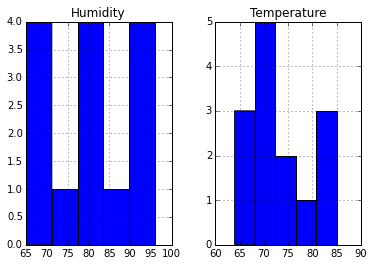

In [6]:
df.hist(['Temperature','Humidity'],bins=5)

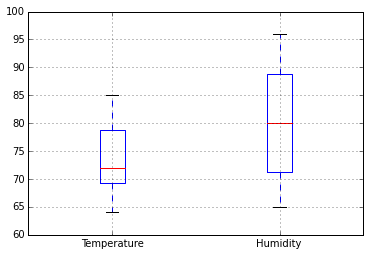

In [7]:
df[['Temperature','Humidity']].plot(kind='box')

###Scatterplots for examining bivariate relationships

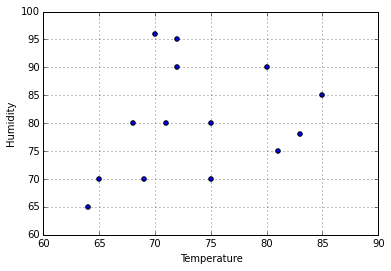

In [8]:
df.plot('Temperature', 'Humidity', kind='scatter')

###If we want to color the scatterplots according to a category, it requires a bit of matplotlib...ugh!

In [9]:
groups=df.groupby('Outlook')
for name, group in groups:
    print name

overcast
rain
sunny


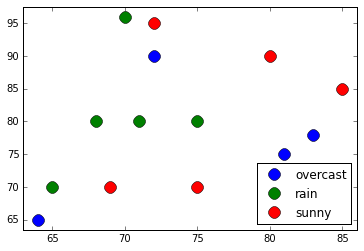

In [10]:
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()

#What about the categorical variables? Frequency tables and relative frequency tables

###Simply df.value_counts() gets you the frequencies

In [11]:
df['Outlook'].value_counts()

rain        5
sunny       5
overcast    4
dtype: int64

###Using apply will get you the value counts for multiple columns at once

In [12]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

,Outlook,Result
Don't Play,NaN,5
Play,NaN,9
overcast,4,NaN
rain,5,NaN
sunny,5,NaN


###Contingency Tables for looking at bivariate relationships between two categorical variables

In [13]:
pd.crosstab(df['Outlook'], df['Result'])

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,2,3
sunny,3,2


###Often we want the row percentages

In [14]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

Result,Don't Play,Play
Outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


###Or the column percentages

In [15]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

Result,Don't Play,Play
Outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


#Enough...lets get to the pair sprint

https://www.youtube.com/watch?v=yGf6LNWY9AI